# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

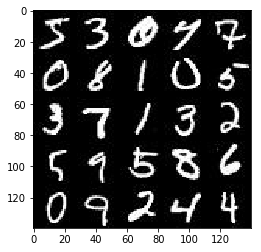

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

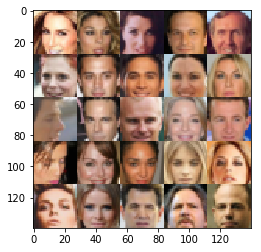

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Development\Anaconda\envs\Udacity\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    input_z = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return input_real, input_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [13]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x56
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x112
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x224

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [14]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x448 now

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x224 now

        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x112 now

        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        # 28x28xout_channel_dim now

        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [15]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha=0.2
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    smooth = 0.1
    d_model_real_labels = tf.ones_like(d_model_real) * (1 - smooth)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=d_model_real_labels))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [16]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [29]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    show_every=100
    print_every=10
    n_images = 25

    samples, losses = [], []
    steps = 0
    
    input_real, input_z, learning_rate2 = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)
        show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4161... Generator Loss: 2.8550
Epoch 1/2... Discriminator Loss: 0.3901... Generator Loss: 3.2047
Epoch 1/2... Discriminator Loss: 0.3552... Generator Loss: 4.1144
Epoch 1/2... Discriminator Loss: 0.5849... Generator Loss: 1.6697
Epoch 1/2... Discriminator Loss: 0.3728... Generator Loss: 3.5576
Epoch 1/2... Discriminator Loss: 0.3474... Generator Loss: 4.5511
Epoch 1/2... Discriminator Loss: 0.3385... Generator Loss: 5.1926
Epoch 1/2... Discriminator Loss: 0.3414... Generator Loss: 5.0664
Epoch 1/2... Discriminator Loss: 0.3525... Generator Loss: 4.5137
Epoch 1/2... Discriminator Loss: 0.7412... Generator Loss: 1.6820


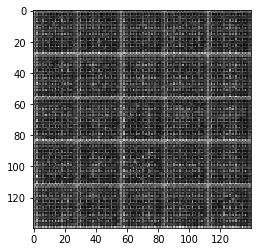

Epoch 1/2... Discriminator Loss: 1.4712... Generator Loss: 1.1485
Epoch 1/2... Discriminator Loss: 0.9629... Generator Loss: 1.7345
Epoch 1/2... Discriminator Loss: 0.9512... Generator Loss: 1.7774
Epoch 1/2... Discriminator Loss: 1.0460... Generator Loss: 1.1810
Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.8004
Epoch 1/2... Discriminator Loss: 1.1945... Generator Loss: 0.7341
Epoch 1/2... Discriminator Loss: 0.8547... Generator Loss: 1.5809
Epoch 1/2... Discriminator Loss: 0.8933... Generator Loss: 1.4432
Epoch 1/2... Discriminator Loss: 0.9774... Generator Loss: 1.9674
Epoch 1/2... Discriminator Loss: 0.9494... Generator Loss: 1.3906


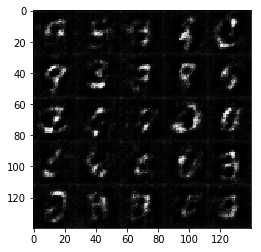

Epoch 1/2... Discriminator Loss: 0.9375... Generator Loss: 1.5278
Epoch 1/2... Discriminator Loss: 0.8866... Generator Loss: 1.3094
Epoch 1/2... Discriminator Loss: 0.9462... Generator Loss: 0.9814
Epoch 1/2... Discriminator Loss: 0.9210... Generator Loss: 1.3300
Epoch 1/2... Discriminator Loss: 0.9631... Generator Loss: 1.8136
Epoch 1/2... Discriminator Loss: 1.0493... Generator Loss: 2.1173
Epoch 1/2... Discriminator Loss: 0.8258... Generator Loss: 1.7932
Epoch 1/2... Discriminator Loss: 0.9856... Generator Loss: 1.0064
Epoch 1/2... Discriminator Loss: 0.8544... Generator Loss: 1.4754
Epoch 1/2... Discriminator Loss: 0.8305... Generator Loss: 1.3288


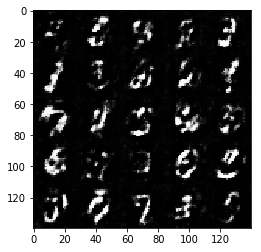

Epoch 1/2... Discriminator Loss: 0.8021... Generator Loss: 1.3636
Epoch 1/2... Discriminator Loss: 0.7720... Generator Loss: 1.8379
Epoch 1/2... Discriminator Loss: 0.8233... Generator Loss: 1.7919
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 2.3618
Epoch 1/2... Discriminator Loss: 0.7041... Generator Loss: 1.9084
Epoch 1/2... Discriminator Loss: 0.7167... Generator Loss: 1.5376
Epoch 1/2... Discriminator Loss: 0.8846... Generator Loss: 2.6020
Epoch 1/2... Discriminator Loss: 0.7210... Generator Loss: 1.8640
Epoch 1/2... Discriminator Loss: 0.8494... Generator Loss: 1.1001
Epoch 1/2... Discriminator Loss: 0.6452... Generator Loss: 1.7341


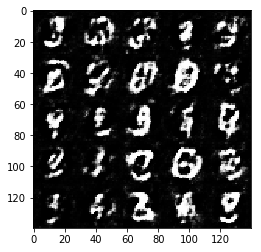

Epoch 1/2... Discriminator Loss: 0.9472... Generator Loss: 3.0623
Epoch 1/2... Discriminator Loss: 1.0848... Generator Loss: 0.7820
Epoch 1/2... Discriminator Loss: 0.7004... Generator Loss: 2.3830
Epoch 1/2... Discriminator Loss: 0.6481... Generator Loss: 1.5728
Epoch 1/2... Discriminator Loss: 0.7882... Generator Loss: 2.3580
Epoch 1/2... Discriminator Loss: 0.6341... Generator Loss: 2.3798
Epoch 2/2... Discriminator Loss: 0.7403... Generator Loss: 1.4761
Epoch 2/2... Discriminator Loss: 0.5779... Generator Loss: 2.0134
Epoch 2/2... Discriminator Loss: 0.6741... Generator Loss: 1.6810
Epoch 2/2... Discriminator Loss: 0.6903... Generator Loss: 1.4862


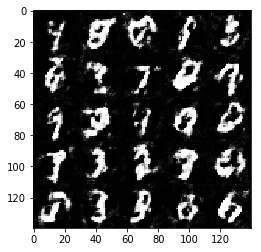

Epoch 2/2... Discriminator Loss: 0.5638... Generator Loss: 2.0425
Epoch 2/2... Discriminator Loss: 0.9921... Generator Loss: 0.8925
Epoch 2/2... Discriminator Loss: 0.6423... Generator Loss: 1.8553
Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 1.1490
Epoch 2/2... Discriminator Loss: 0.6438... Generator Loss: 2.6136
Epoch 2/2... Discriminator Loss: 0.6107... Generator Loss: 1.7797
Epoch 2/2... Discriminator Loss: 0.5946... Generator Loss: 1.9731
Epoch 2/2... Discriminator Loss: 0.7363... Generator Loss: 2.3734
Epoch 2/2... Discriminator Loss: 1.0281... Generator Loss: 0.8679
Epoch 2/2... Discriminator Loss: 0.6419... Generator Loss: 2.0278


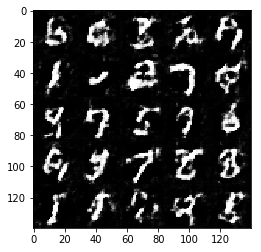

Epoch 2/2... Discriminator Loss: 0.7437... Generator Loss: 2.0137
Epoch 2/2... Discriminator Loss: 0.6707... Generator Loss: 1.6105
Epoch 2/2... Discriminator Loss: 1.1727... Generator Loss: 0.7388
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.3102
Epoch 2/2... Discriminator Loss: 1.0970... Generator Loss: 0.7675
Epoch 2/2... Discriminator Loss: 0.9652... Generator Loss: 2.0332
Epoch 2/2... Discriminator Loss: 0.8319... Generator Loss: 1.8789
Epoch 2/2... Discriminator Loss: 1.0164... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 0.7232... Generator Loss: 1.7956
Epoch 2/2... Discriminator Loss: 0.8865... Generator Loss: 1.1937


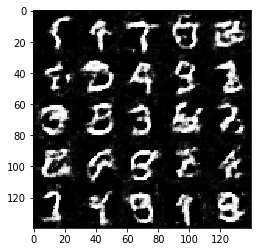

Epoch 2/2... Discriminator Loss: 0.8156... Generator Loss: 1.2562
Epoch 2/2... Discriminator Loss: 0.7463... Generator Loss: 1.6778
Epoch 2/2... Discriminator Loss: 0.7980... Generator Loss: 1.3988
Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 1.8374
Epoch 2/2... Discriminator Loss: 1.0725... Generator Loss: 0.8584
Epoch 2/2... Discriminator Loss: 0.8779... Generator Loss: 1.0563
Epoch 2/2... Discriminator Loss: 0.7819... Generator Loss: 1.6362
Epoch 2/2... Discriminator Loss: 1.0144... Generator Loss: 0.8426
Epoch 2/2... Discriminator Loss: 0.9780... Generator Loss: 0.8787
Epoch 2/2... Discriminator Loss: 0.8452... Generator Loss: 1.5105


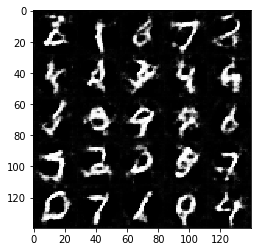

Epoch 2/2... Discriminator Loss: 0.8963... Generator Loss: 1.1360
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 2.0813
Epoch 2/2... Discriminator Loss: 0.7596... Generator Loss: 1.4714
Epoch 2/2... Discriminator Loss: 0.7625... Generator Loss: 1.6441
Epoch 2/2... Discriminator Loss: 0.9376... Generator Loss: 0.9040
Epoch 2/2... Discriminator Loss: 0.8809... Generator Loss: 1.1802
Epoch 2/2... Discriminator Loss: 0.9640... Generator Loss: 1.0067
Epoch 2/2... Discriminator Loss: 1.0103... Generator Loss: 2.1637
Epoch 2/2... Discriminator Loss: 1.0242... Generator Loss: 2.1785
Epoch 2/2... Discriminator Loss: 0.8298... Generator Loss: 1.5769


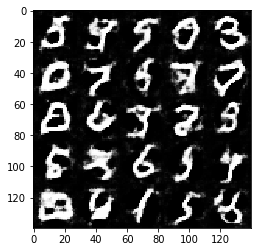

Epoch 2/2... Discriminator Loss: 1.2873... Generator Loss: 0.5914
Epoch 2/2... Discriminator Loss: 0.9525... Generator Loss: 1.9347
Epoch 2/2... Discriminator Loss: 0.7746... Generator Loss: 1.3466


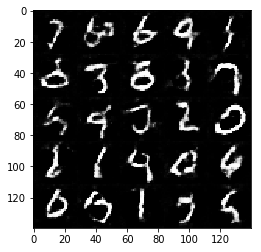

In [32]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 1.4318
Epoch 1/1... Discriminator Loss: 0.6013... Generator Loss: 1.8034
Epoch 1/1... Discriminator Loss: 0.5448... Generator Loss: 2.0653
Epoch 1/1... Discriminator Loss: 0.4863... Generator Loss: 2.4768
Epoch 1/1... Discriminator Loss: 0.5717... Generator Loss: 1.8521
Epoch 1/1... Discriminator Loss: 0.5078... Generator Loss: 2.7062
Epoch 1/1... Discriminator Loss: 0.4950... Generator Loss: 2.8233
Epoch 1/1... Discriminator Loss: 0.7597... Generator Loss: 1.4022
Epoch 1/1... Discriminator Loss: 0.6328... Generator Loss: 2.4568
Epoch 1/1... Discriminator Loss: 0.6722... Generator Loss: 1.6896


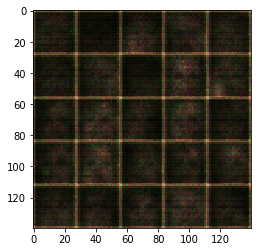

Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 1.1056
Epoch 1/1... Discriminator Loss: 0.7530... Generator Loss: 1.5080
Epoch 1/1... Discriminator Loss: 0.6138... Generator Loss: 2.5630
Epoch 1/1... Discriminator Loss: 0.7425... Generator Loss: 1.7403
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 1.0264
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 0.6600... Generator Loss: 1.9640
Epoch 1/1... Discriminator Loss: 0.9050... Generator Loss: 1.1468
Epoch 1/1... Discriminator Loss: 0.8723... Generator Loss: 1.4248
Epoch 1/1... Discriminator Loss: 0.6990... Generator Loss: 2.3685


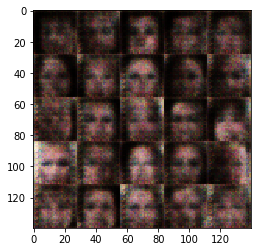

Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 1.1337
Epoch 1/1... Discriminator Loss: 0.6581... Generator Loss: 2.0523
Epoch 1/1... Discriminator Loss: 0.6221... Generator Loss: 1.7959
Epoch 1/1... Discriminator Loss: 0.9405... Generator Loss: 1.0715
Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 1.4266
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 1.0306
Epoch 1/1... Discriminator Loss: 0.7996... Generator Loss: 1.4343
Epoch 1/1... Discriminator Loss: 0.7148... Generator Loss: 2.3426
Epoch 1/1... Discriminator Loss: 0.7235... Generator Loss: 1.6592
Epoch 1/1... Discriminator Loss: 0.6088... Generator Loss: 2.0567


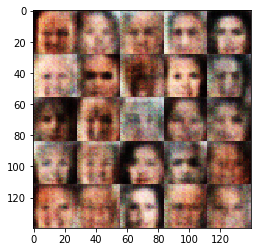

Epoch 1/1... Discriminator Loss: 0.6427... Generator Loss: 1.7382
Epoch 1/1... Discriminator Loss: 0.5572... Generator Loss: 2.4667
Epoch 1/1... Discriminator Loss: 0.7399... Generator Loss: 1.3797
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 1.3113
Epoch 1/1... Discriminator Loss: 0.7422... Generator Loss: 1.3139
Epoch 1/1... Discriminator Loss: 0.5843... Generator Loss: 1.7409
Epoch 1/1... Discriminator Loss: 0.6664... Generator Loss: 1.7159
Epoch 1/1... Discriminator Loss: 0.7506... Generator Loss: 1.6119
Epoch 1/1... Discriminator Loss: 0.8122... Generator Loss: 1.9101


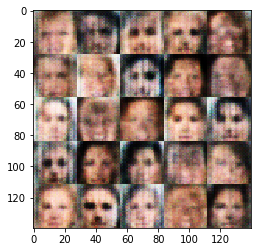

Epoch 1/1... Discriminator Loss: 0.8095... Generator Loss: 2.6813
Epoch 1/1... Discriminator Loss: 0.7920... Generator Loss: 1.6753
Epoch 1/1... Discriminator Loss: 0.9299... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.9002... Generator Loss: 0.3149
Epoch 1/1... Discriminator Loss: 0.7628... Generator Loss: 1.3375
Epoch 1/1... Discriminator Loss: 0.7579... Generator Loss: 1.3668
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 0.7221... Generator Loss: 1.5677
Epoch 1/1... Discriminator Loss: 1.0639... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 1.2750


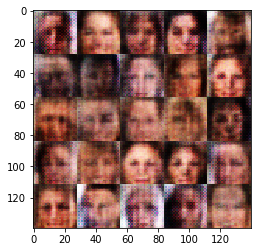

Epoch 1/1... Discriminator Loss: 0.8434... Generator Loss: 1.2629
Epoch 1/1... Discriminator Loss: 1.0303... Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 0.9585... Generator Loss: 1.3422
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 0.9284... Generator Loss: 1.5457
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 1.2134
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 1.3234
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 1.8985


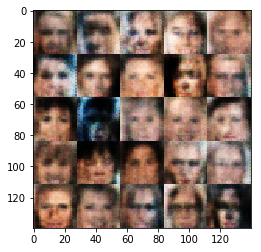

Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 1.4917
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.1007
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.2170
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 1.2930
Epoch 1/1... Discriminator Loss: 1.0504... Generator Loss: 1.1037
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 1.5772
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 0.9257... Generator Loss: 1.1951


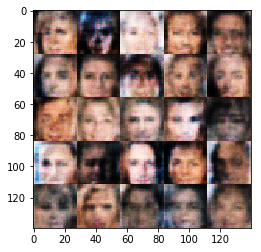

Epoch 1/1... Discriminator Loss: 0.9654... Generator Loss: 1.1617
Epoch 1/1... Discriminator Loss: 1.1233... Generator Loss: 1.8285
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 1.0071
Epoch 1/1... Discriminator Loss: 0.9480... Generator Loss: 1.1296
Epoch 1/1... Discriminator Loss: 0.9959... Generator Loss: 1.2586
Epoch 1/1... Discriminator Loss: 0.9884... Generator Loss: 1.0663
Epoch 1/1... Discriminator Loss: 0.9596... Generator Loss: 1.4987
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 1.0787
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 1.0866
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 1.4393


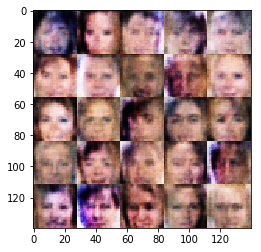

Epoch 1/1... Discriminator Loss: 1.0506... Generator Loss: 0.8234
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 0.9864... Generator Loss: 1.2144
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 0.9756
Epoch 1/1... Discriminator Loss: 0.9824... Generator Loss: 1.4834
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 0.9846
Epoch 1/1... Discriminator Loss: 0.9418... Generator Loss: 1.2107
Epoch 1/1... Discriminator Loss: 1.0159... Generator Loss: 1.1697
Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.1587


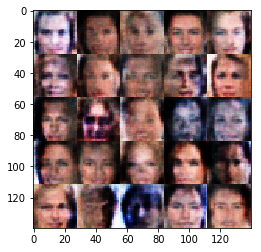

Epoch 1/1... Discriminator Loss: 1.0973... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 1.5023
Epoch 1/1... Discriminator Loss: 1.0676... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 1.1699
Epoch 1/1... Discriminator Loss: 1.0563... Generator Loss: 1.1363
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 0.9534
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.5248
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 1.4015
Epoch 1/1... Discriminator Loss: 0.9161... Generator Loss: 1.3470


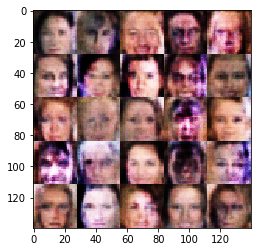

Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.2414
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.2071
Epoch 1/1... Discriminator Loss: 0.8929... Generator Loss: 1.4011
Epoch 1/1... Discriminator Loss: 0.9826... Generator Loss: 1.0813
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 1.1714
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 1.2033
Epoch 1/1... Discriminator Loss: 0.9028... Generator Loss: 1.2190
Epoch 1/1... Discriminator Loss: 0.9584... Generator Loss: 1.0255
Epoch 1/1... Discriminator Loss: 0.8421... Generator Loss: 1.1838
Epoch 1/1... Discriminator Loss: 1.0424... Generator Loss: 0.8292


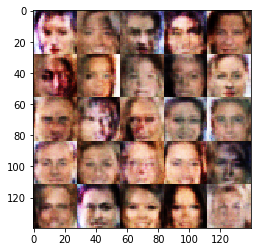

Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 1.7920
Epoch 1/1... Discriminator Loss: 0.8008... Generator Loss: 1.6293
Epoch 1/1... Discriminator Loss: 0.8419... Generator Loss: 1.1727
Epoch 1/1... Discriminator Loss: 0.8137... Generator Loss: 1.7123
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 1.3132
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.5487
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 1.3956
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.5741
Epoch 1/1... Discriminator Loss: 0.7297... Generator Loss: 2.0427


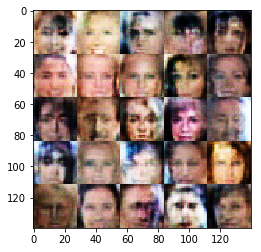

Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.3991
Epoch 1/1... Discriminator Loss: 0.9437... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 0.8953... Generator Loss: 1.5954
Epoch 1/1... Discriminator Loss: 1.0426... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 0.9903
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 1.4922
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 2.1488
Epoch 1/1... Discriminator Loss: 1.0152... Generator Loss: 1.1822


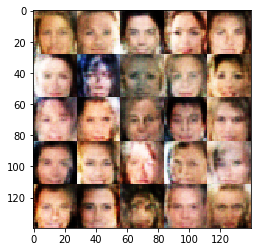

Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 1.3307
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 1.2983
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 1.5699
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.2627
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 0.9888
Epoch 1/1... Discriminator Loss: 0.9359... Generator Loss: 1.0293
Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 0.9691
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 1.2316
Epoch 1/1... Discriminator Loss: 0.8915... Generator Loss: 1.3778


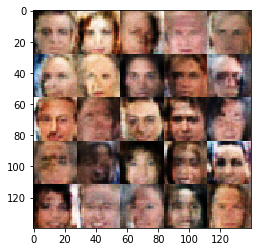

Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 1.6381
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 1.3547
Epoch 1/1... Discriminator Loss: 1.1753... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 0.9143... Generator Loss: 1.6582
Epoch 1/1... Discriminator Loss: 0.9243... Generator Loss: 1.8852
Epoch 1/1... Discriminator Loss: 1.0608... Generator Loss: 1.4581
Epoch 1/1... Discriminator Loss: 0.9011... Generator Loss: 1.2110
Epoch 1/1... Discriminator Loss: 0.9895... Generator Loss: 0.8857
Epoch 1/1... Discriminator Loss: 1.0779... Generator Loss: 2.2287


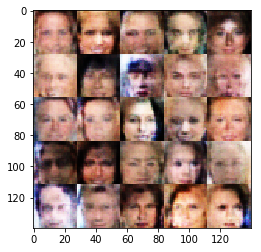

Epoch 1/1... Discriminator Loss: 0.7516... Generator Loss: 1.4547
Epoch 1/1... Discriminator Loss: 0.7071... Generator Loss: 1.8028
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 1.2795
Epoch 1/1... Discriminator Loss: 0.7492... Generator Loss: 1.9331
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.4541
Epoch 1/1... Discriminator Loss: 0.8450... Generator Loss: 1.2789
Epoch 1/1... Discriminator Loss: 0.8095... Generator Loss: 1.4870
Epoch 1/1... Discriminator Loss: 0.8167... Generator Loss: 1.4546
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 0.7710... Generator Loss: 2.0183


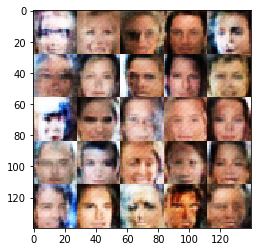

Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 1.3297
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.1617
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 2.2454
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.5423
Epoch 1/1... Discriminator Loss: 0.7922... Generator Loss: 1.1914
Epoch 1/1... Discriminator Loss: 0.8482... Generator Loss: 1.8914
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 0.9119
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.0000
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 1.9924
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 1.1081


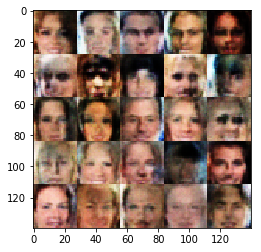

Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 1.5510
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.3930
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.3034
Epoch 1/1... Discriminator Loss: 0.9551... Generator Loss: 1.1377
Epoch 1/1... Discriminator Loss: 0.9943... Generator Loss: 1.5117
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 1.1747
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.6032
Epoch 1/1... Discriminator Loss: 0.9328... Generator Loss: 1.0743
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 0.9646
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 0.9081


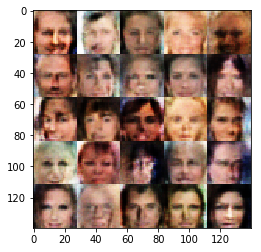

Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 1.0619
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.9202
Epoch 1/1... Discriminator Loss: 0.8974... Generator Loss: 1.0677
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 1.8010
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 1.1591
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.8013


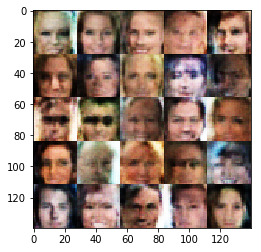

Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.1768
Epoch 1/1... Discriminator Loss: 0.9154... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 0.9605... Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 0.9799... Generator Loss: 1.2882
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 1.3391
Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 0.8170... Generator Loss: 1.1027
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.1762
Epoch 1/1... Discriminator Loss: 0.9092... Generator Loss: 1.2124


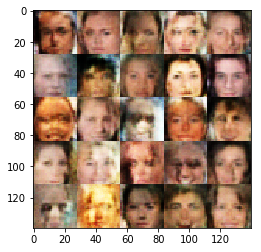

Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.2344
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 1.5014
Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.5395
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.4421
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 1.8069... Generator Loss: 0.2914
Epoch 1/1... Discriminator Loss: 1.0280... Generator Loss: 0.9498


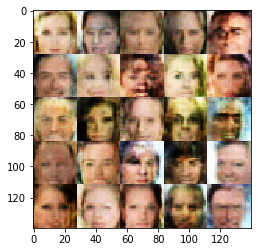

Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 1.1151
Epoch 1/1... Discriminator Loss: 0.9255... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 0.9027... Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 0.8113... Generator Loss: 1.2448
Epoch 1/1... Discriminator Loss: 0.8858... Generator Loss: 1.0668
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 0.8987... Generator Loss: 1.1786
Epoch 1/1... Discriminator Loss: 1.0488... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 1.8529


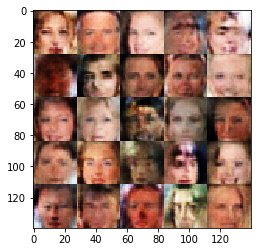

Epoch 1/1... Discriminator Loss: 0.8956... Generator Loss: 1.1449
Epoch 1/1... Discriminator Loss: 0.9328... Generator Loss: 1.2076
Epoch 1/1... Discriminator Loss: 0.9779... Generator Loss: 1.4692
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 0.8311... Generator Loss: 1.5487
Epoch 1/1... Discriminator Loss: 0.7174... Generator Loss: 1.7268
Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 0.9389
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.4081
Epoch 1/1... Discriminator Loss: 0.8413... Generator Loss: 1.1833
Epoch 1/1... Discriminator Loss: 0.5998... Generator Loss: 1.7277


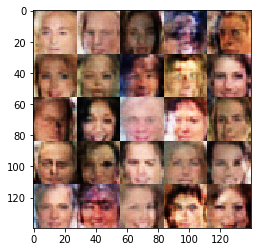

Epoch 1/1... Discriminator Loss: 1.1963... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 0.8700... Generator Loss: 1.6467
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 0.9866
Epoch 1/1... Discriminator Loss: 1.0188... Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 0.7773... Generator Loss: 1.2870
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.5975
Epoch 1/1... Discriminator Loss: 0.9347... Generator Loss: 2.3694
Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 1.0800
Epoch 1/1... Discriminator Loss: 0.8156... Generator Loss: 1.1327


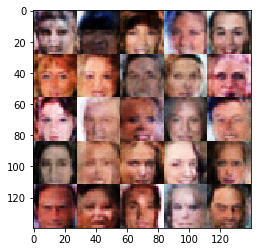

Epoch 1/1... Discriminator Loss: 0.7501... Generator Loss: 1.3975
Epoch 1/1... Discriminator Loss: 0.8627... Generator Loss: 1.6358
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 2.5266
Epoch 1/1... Discriminator Loss: 0.8027... Generator Loss: 1.7007
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.4816
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.9012
Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 0.8642
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.4614
Epoch 1/1... Discriminator Loss: 0.8080... Generator Loss: 1.3689
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.7133


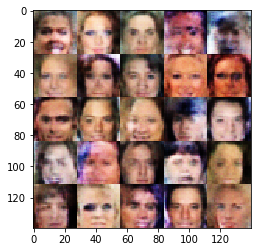

Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 1.4646
Epoch 1/1... Discriminator Loss: 0.6927... Generator Loss: 1.4205
Epoch 1/1... Discriminator Loss: 0.6793... Generator Loss: 2.4308
Epoch 1/1... Discriminator Loss: 0.8061... Generator Loss: 1.3174
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 0.9420... Generator Loss: 1.0636
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 0.8523... Generator Loss: 1.0732
Epoch 1/1... Discriminator Loss: 0.9941... Generator Loss: 0.9622
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.6349


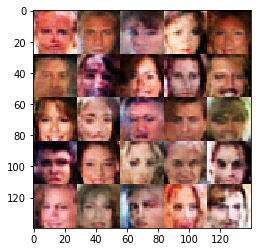

Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 1.4261
Epoch 1/1... Discriminator Loss: 0.9469... Generator Loss: 1.0385
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 0.9923
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 0.6841
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 0.9844
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 1.9429
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 1.5837... Generator Loss: 0.3991
Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 1.5243
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 1.7807


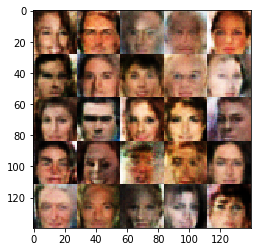

Epoch 1/1... Discriminator Loss: 0.6821... Generator Loss: 1.7107
Epoch 1/1... Discriminator Loss: 2.2322... Generator Loss: 0.2114
Epoch 1/1... Discriminator Loss: 0.9460... Generator Loss: 1.0435
Epoch 1/1... Discriminator Loss: 0.7030... Generator Loss: 1.6095
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 0.6713... Generator Loss: 1.9006
Epoch 1/1... Discriminator Loss: 0.8170... Generator Loss: 1.0775
Epoch 1/1... Discriminator Loss: 0.5736... Generator Loss: 1.8879
Epoch 1/1... Discriminator Loss: 0.7733... Generator Loss: 1.5218
Epoch 1/1... Discriminator Loss: 0.5847... Generator Loss: 2.2148


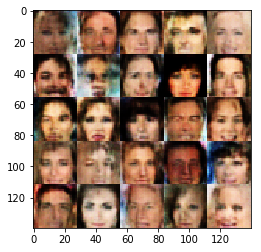

Epoch 1/1... Discriminator Loss: 0.9366... Generator Loss: 1.5802
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.9565
Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 1.1521
Epoch 1/1... Discriminator Loss: 0.9898... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 0.5879... Generator Loss: 1.7714
Epoch 1/1... Discriminator Loss: 0.5758... Generator Loss: 1.8820
Epoch 1/1... Discriminator Loss: 0.5739... Generator Loss: 1.7239
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 3.3956
Epoch 1/1... Discriminator Loss: 0.5998... Generator Loss: 1.7197
Epoch 1/1... Discriminator Loss: 0.5123... Generator Loss: 2.1120


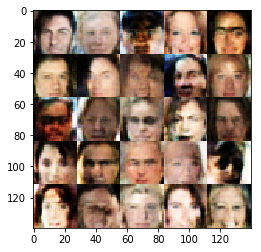

Epoch 1/1... Discriminator Loss: 0.5752... Generator Loss: 2.8500
Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 3.8742
Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 2.7303
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 2.5823
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 2.6672
Epoch 1/1... Discriminator Loss: 0.7645... Generator Loss: 4.5009
Epoch 1/1... Discriminator Loss: 0.8074... Generator Loss: 4.8618
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 6.1455
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 0.4698... Generator Loss: 2.9773


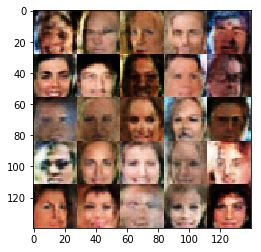

Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 2.8980
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 1.7545
Epoch 1/1... Discriminator Loss: 0.7693... Generator Loss: 4.2391
Epoch 1/1... Discriminator Loss: 0.4567... Generator Loss: 2.8990
Epoch 1/1... Discriminator Loss: 0.8783... Generator Loss: 1.0000
Epoch 1/1... Discriminator Loss: 0.4843... Generator Loss: 2.7528
Epoch 1/1... Discriminator Loss: 0.4708... Generator Loss: 3.2188
Epoch 1/1... Discriminator Loss: 0.3504... Generator Loss: 6.5326
Epoch 1/1... Discriminator Loss: 0.5193... Generator Loss: 2.3869
Epoch 1/1... Discriminator Loss: 0.7133... Generator Loss: 1.3731


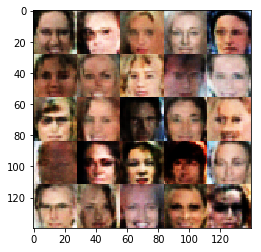

Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.5378
Epoch 1/1... Discriminator Loss: 0.4225... Generator Loss: 2.9153
Epoch 1/1... Discriminator Loss: 0.3971... Generator Loss: 3.0778
Epoch 1/1... Discriminator Loss: 0.5082... Generator Loss: 4.1898
Epoch 1/1... Discriminator Loss: 0.7637... Generator Loss: 1.2583
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 1.2815


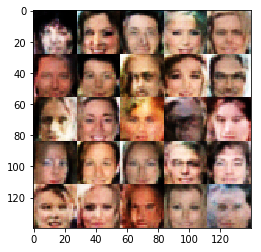

In [33]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.